## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Data Analysis & Visualization

In [2]:
# read the dataset
df = pd.read_csv('Churn_Modelling.csv')

# see the first five rows of df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#shape
df.shape

(10000, 14)

In [4]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#checking duplicate rows()
df.duplicated().sum()

0

In [7]:
# dropping the irrelevant columns 
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [8]:
# check the value counts of "Geography" column.
df_geography = df['Geography'].value_counts()
df_geography

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

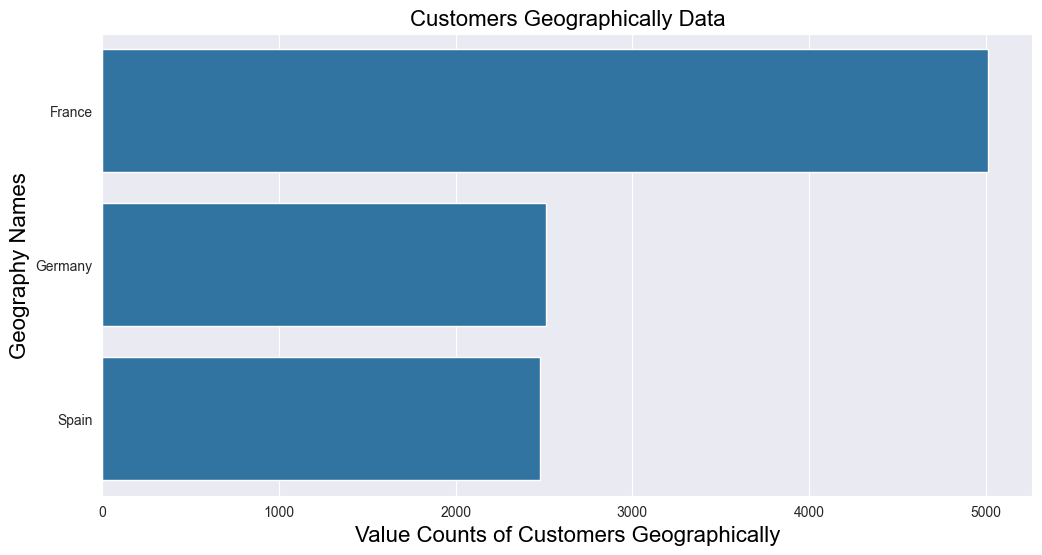

In [9]:
# performing univarient eda on "Geography" column. 
plt.figure(figsize=(12,6))
sns.barplot(x=df_geography, y=df_geography.index)
plt.xlabel('Value Counts of Customers Geographically',fontsize = 16, color='black')
plt.ylabel('Geography Names',fontsize = 16, color='black')
plt.title('Customers Geographically Data',fontsize = 16, color='black')
plt.show()

In [10]:
#value_count of gender
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## Apply One Hot Encoding Technique on Gender & Geography Column¶

In [11]:
df=pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True)

## Let's Handle the Imbalanced Target Column and Balanced it

In [12]:
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of majority class samples
                              random_state=42)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])

In [13]:
# check the target_balanced_data
balanced_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
6,822,50,7,0.00,2,1,1,10062.80,0,True,False,False
8,501,44,4,142051.07,2,0,1,74940.50,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5701,625,49,4,128504.76,1,1,0,126812.63,1,False,True,False
9337,466,47,5,102085.72,1,1,1,183536.24,1,False,True,False
4345,720,46,3,97042.60,1,1,1,133516.51,1,True,True,False
1085,803,42,5,0.00,1,1,0,196466.83,1,True,False,False


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
balanced_data['Exited'].value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

In [16]:
balanced_data.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [17]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 1 to 3694
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        15926 non-null  int64  
 1   Age                15926 non-null  int64  
 2   Tenure             15926 non-null  int64  
 3   Balance            15926 non-null  float64
 4   NumOfProducts      15926 non-null  int64  
 5   HasCrCard          15926 non-null  int64  
 6   IsActiveMember     15926 non-null  int64  
 7   EstimatedSalary    15926 non-null  float64
 8   Exited             15926 non-null  int64  
 9   Gender_Male        15926 non-null  bool   
 10  Geography_Germany  15926 non-null  bool   
 11  Geography_Spain    15926 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 1.3 MB


## Split the Data for model Training and Testing

In [18]:
x = balanced_data.drop('Exited',axis=1)
y = balanced_data['Exited']

In [19]:
# use sklearn for train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [20]:
#applying standards scaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)

## Model Building - Artificial - Neural - Network - ANN

In [21]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
history = model.fit(x_train_scaled, ytrain, epochs = 100, validation_split=0.2)

Epoch 1/100
319/319 [==============================] - 1s 1ms/step - loss: 0.6452 - accuracy: 0.6308 - val_loss: 0.6037 - val_accuracy: 0.6774
Epoch 2/100
319/319 [==============================] - 0s 941us/step - loss: 0.5850 - accuracy: 0.6976 - val_loss: 0.5722 - val_accuracy: 0.7131
Epoch 3/100
319/319 [==============================] - 0s 1ms/step - loss: 0.5690 - accuracy: 0.7116 - val_loss: 0.5633 - val_accuracy: 0.7135
Epoch 4/100
319/319 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.7160 - val_loss: 0.5555 - val_accuracy: 0.7186
Epoch 5/100
319/319 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.7255 - val_loss: 0.5463 - val_accuracy: 0.7300
Epoch 6/100
319/319 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.7339 - val_loss: 0.5320 - val_accuracy: 0.7382
Epoch 7/100
319/319 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7437 - val_loss: 0.5100 - val_accuracy: 0.75

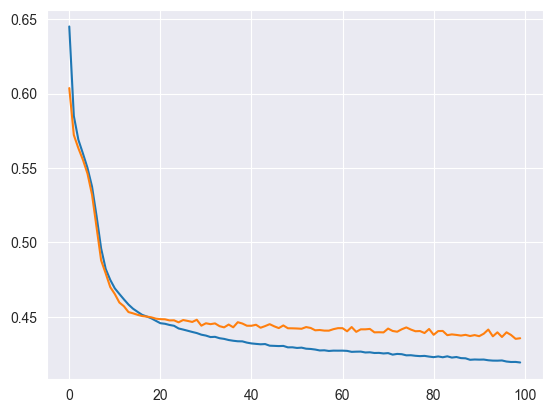

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

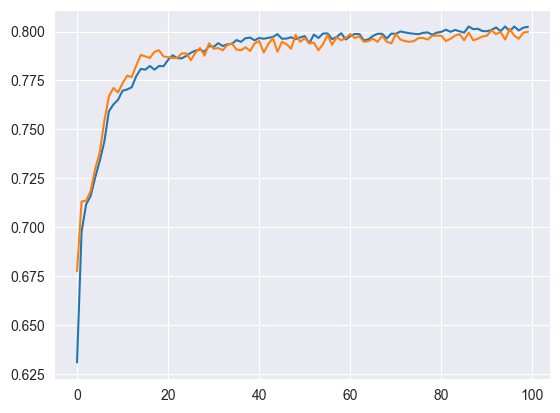

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
prediction = model.predict(x_test_scaled)

100/100 [==============================] - 0s 542us/step


In [28]:
y_pred = np.where(prediction > 0.5, 1, 0)

In [29]:
accuracy_score(ytest, y_pred)

0.7966101694915254

In [30]:
model.save("customer_churn_model.h5")

In [31]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
